# Importing Main Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

# Helper Functions

In [2]:
## Helper function to display Confusion Matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import itertools


'''
Confusion Matrix display code has been modified from the link below
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
'''
def confusion_matrix_display(confusion_matrix, class_names, title):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    threshold = confusion_matrix.max() / 2
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j,i, format(confusion_matrix[i,j], '.1f'), horizontalalignment='center',
                 color='white' if confusion_matrix[i, j] > threshold else 'black')
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()

    

## Helper Function to display Precision
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def precision_display(label, actual, predicted):
    print(label)
    prec_weighted = precision_score(predicted, actual, average="weighted")
    prec_macro = precision_score(predicted, actual, average="macro")
    prec_micro = precision_score(predicted, actual, average="micro")
    prec_none = precision_score(predicted, actual, average=None)
    class_report = classification_report(actual, predicted)
    
    print("Precision scores for each class: 'None'")
    print(str(prec_none) + "\n")
    print("Precision by Total True Positives, false negatives and false positives: 'Micro'")
    print("%.2f" % round(prec_micro, 2) + "\n")
    print("Precision by calculating metrics for each labels, and then their unweighted mean: 'Macro'")
    print("%.2f" % round(prec_macro, 2) + "\n")
    print("Precision by calculating metrics for each label and their average: 'Weighted'")
    print("%.2f" % round(prec_weighted, 2) + "\n")
    print("Classification Report: \n")
    print(class_report)

    
## Helper Function to compute accuracy:
def compute_accuracy(actual, pred):
    acc = 0
    actual = actual.values
    for i in range(0, len(actual)):
        if pred[i] == actual[i]:
            acc += 1
    acc = (acc / len(pred)) * 100
    print("%.2f" % round(acc,2) + "%")

## Task 1
## Import Data and Transform data to binary classification.

In [14]:
total_data = pd.read_excel("DATASET.xlsx")

total_data = total_data.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0, 0, 0, 1, 1, 1, 1])

classes = total_data[['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer', 'VSA']]

total_data['class'] = classes.max(axis=1)

data = total_data.loc[:, 'Age':'SS']

classes = total_data['class']

labels = ['NoUser', 'User']

labels_features = ['Age','Gender','Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

print("Top 10 rows of our data are :\n")
print(data.head(10))
print("And their corresponding classes are :\n")
print(classes.head(10))

Top 10 rows of our data are :

       Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
5  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   
6  1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207 -0.45174   
7  0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886 -0.84732   
8  0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309 -0.97631   
9  1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332 -1.42424   

    Ascore   Cscore  Impulsive       SS  
0 -0.91699 -0.00665   -0.21712 -1.1

# Split data into test and train so that it can be used for all the different classifiers
### Below the total data is split into 4 parts which are being used by all the classifiers
#### trainX - feature data for training
#### trainY - class labels for feature data of trainX
#### testX - feature data for testing
#### testY - class labels for feature data of testX

Note: rerun the block below to generate new test and training sets

In [15]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(data, classes, test_size=0.3, shuffle=True)

# Task 2 : Decision Tree

## We define a decision tree and fit it to trainX and trainY, then predict labels for testX and finally compute the classifier accuracy.

## Then we display the tree with a max depth of 3.

Note: The Tree generated is too big to display in jupyter notebook. Hence we limit the size of the tree generated by setting the max depth of the graph to 3. To get the complete Tree execute code in the commented blocks.

Note: The variable 'max' below can be used to change the max depth of the Tree

Accuracy for Decision Tree Using our Dataset is:

71.02%

Tree with max_depth as : 3


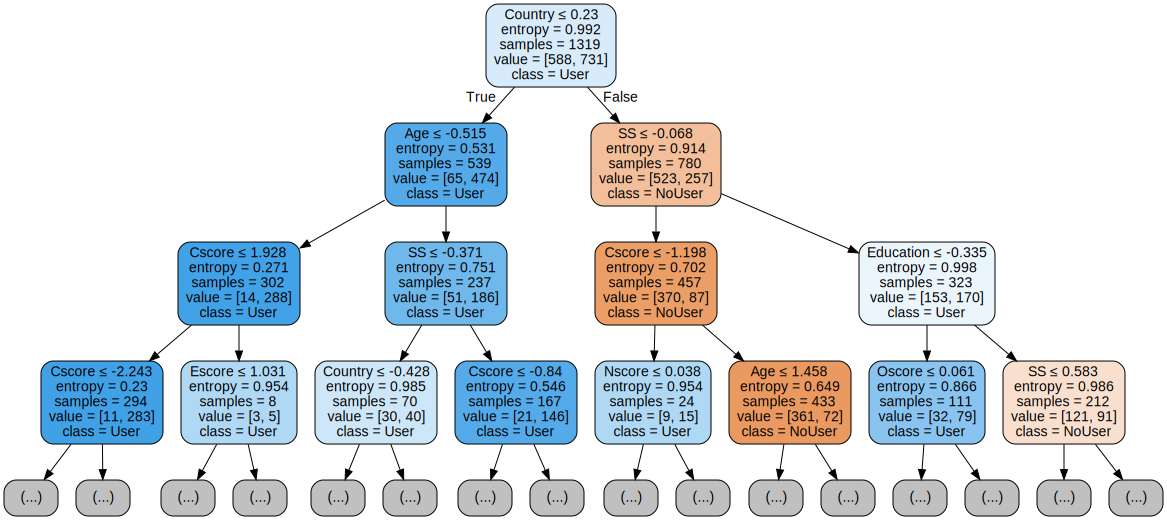

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


import graphviz

# Define the classifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier = classifier.fit(trainX, trainY)

## Change the variable below to change the max depth of the tree
max = 3
## Comment this when generating complete tree

graph1 = tree.export_graphviz(classifier, out_file=None, 
                              feature_names=list(data.columns.values),
                              class_names=labels,
                              filled=True, rounded=True,
                              special_characters=True,
                              max_depth=max
                             )


# Use the below code to get complete tree which displays in the notebook and stores in a pdf
''' 
graph1 = tree.export_graphviz(classifier, out_file=None, 
                              feature_names=list(data.columns.values),
                              class_names=labels,
                              filled=True, rounded=True,
                              special_characters=True,
                            )
'''

graph = graphviz.Source(graph1)

## Execute below commented line to get the tree in a pdf output file
#graph.render("tree")

pred_tree = classifier.predict(testX)


print("Accuracy for Decision Tree Using our Dataset is:\n")
compute_accuracy(testY, pred_tree)

print("\nTree with max_depth as : " + str(max))
graph


# Task 3

# Naive Bayes using Laplace Smoothing

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model = gnb.fit(trainX, trainY)


pred_nb = model.predict(testX)

print("Accuracy for our Dataset using Naive Bayes classifier is:\n")
compute_accuracy(testY, pred_nb)



Accuracy for our Dataset using Naive Bayes classifier is:

77.56%


# Task 4
## Decision Tree in Task 2

Precision for Decision Tree:
Precision scores for each class: 'None'
[ 0.63888889  0.76751592]

Precision by Total True Positives, false negatives and false positives: 'Micro'
0.71

Precision by calculating metrics for each labels, and then their unweighted mean: 'Macro'
0.70

Precision by calculating metrics for each label and their average: 'Weighted'
0.71

Classification Report: 

             precision    recall  f1-score   support

          0       0.69      0.64      0.66       252
          1       0.73      0.77      0.75       314

avg / total       0.71      0.71      0.71       566

Confusion Matrix for Decision Tree:


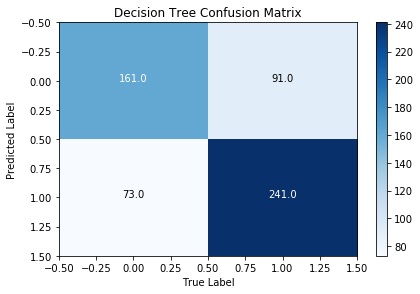

In [18]:
precision_display("Precision for Decision Tree:", testY, pred_tree)

print("Confusion Matrix for Decision Tree:")

cnf_matrix_tree = confusion_matrix(testY, pred_tree)
confusion_matrix_display(cnf_matrix_tree, labels, "Decision Tree Confusion Matrix")


## Naive Bayes in Task 3

Precision for Naive Bayes:
Precision scores for each class: 'None'
[ 0.79365079  0.7611465 ]

Precision by Total True Positives, false negatives and false positives: 'Micro'
0.78

Precision by calculating metrics for each labels, and then their unweighted mean: 'Macro'
0.78

Precision by calculating metrics for each label and their average: 'Weighted'
0.78

Classification Report: 

             precision    recall  f1-score   support

          0       0.73      0.79      0.76       252
          1       0.82      0.76      0.79       314

avg / total       0.78      0.78      0.78       566

Confusion Matrix for Naive Bayes


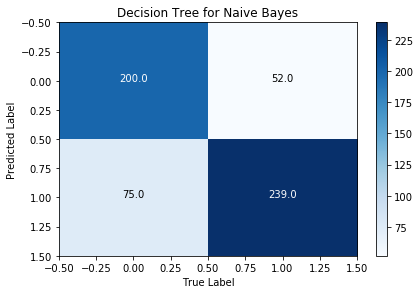

In [19]:
precision_display("Precision for Naive Bayes:" , testY, pred_nb)

print("Confusion Matrix for Naive Bayes")

cnf_matrix_nb = confusion_matrix(testY, pred_nb)
confusion_matrix_display(cnf_matrix_nb, labels, "Decision Tree for Naive Bayes")


# Task 5

## Knn using default k as 3
## We can change the value of k by changing the variable k below

In [20]:
from sklearn.neighbors import KNeighborsClassifier

## Set K to required value
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trainX, trainY)

pred_knn = knn.predict(testX)
print("Accuracy for knn using our Dataset is:")
compute_accuracy(testY, pred_knn)


Accuracy for knn using our Dataset is:
74.56%


# Task 4 cont...

## KNN in Task 5


Precision for KNN:
Precision scores for each class: 'None'
[ 0.75        0.74203822]

Precision by Total True Positives, false negatives and false positives: 'Micro'
0.75

Precision by calculating metrics for each labels, and then their unweighted mean: 'Macro'
0.75

Precision by calculating metrics for each label and their average: 'Weighted'
0.75

Classification Report: 

             precision    recall  f1-score   support

          0       0.70      0.75      0.72       252
          1       0.79      0.74      0.76       314

avg / total       0.75      0.75      0.75       566

Confusion Matrix for KNN


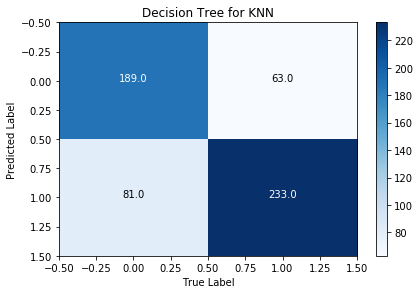

In [21]:
precision_display("Precision for KNN:" , testY, pred_knn)

print("Confusion Matrix for KNN")

cnf_matrix_nb = confusion_matrix(testY, pred_knn)
confusion_matrix_display(cnf_matrix_nb, labels, "Decision Tree for KNN")

# Task 6

## We generate a random forest classifier using our dataset and then compute the top features based on correlation.

## The output displays the top n selected features in order.

Note: Change n variable below if you want to see more than top 3 features

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=None, random_state=1)
forest.fit(trainX, trainY)

feature_array = forest.feature_importances_

## Set the top features to get the top n features. Setting to 3 returns the top 3 features indexes

n = 3
top_feature = feature_array.argsort()[-n:][::-1]

print("The top " + str(n) +" features in order are:")
for i in range(0, n):
    print("Feature " + str(i + 1) +": "+ labels_features[top_feature[i]])

The top 3 features in order are:
Feature 1: Country
Feature 2: Age
Feature 3: SS
